#Library Imports and Installations

In [317]:
import warnings
warnings.filterwarnings('ignore')

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost.sklearn import XGBRegressor

In [319]:
!pip install matplotlib==3.1.3 &> /dev/null

#Retrieving Data

In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
train = pd.read_csv("drive/MyDrive/train.csv")
print("Shape of train set: ", train.shape)

Shape of train set:  (550068, 12)


#Understanding Data

In [322]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [323]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#Missing Values

In [324]:
def missing_val(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [325]:
missing_val(train)

Product_Category_3            69.67266
Product_Category_2            31.56664
Purchase                       0.00000
Product_Category_1             0.00000
Marital_Status                 0.00000
Stay_In_Current_City_Years     0.00000
City_Category                  0.00000
Occupation                     0.00000
Age                            0.00000
Gender                         0.00000
Product_ID                     0.00000
User_ID                        0.00000
dtype: float64

#Exploratory Data Analysis

In [326]:
train.groupby('User_ID')['Product_ID'].nunique()

User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Name: Product_ID, Length: 5891, dtype: int64

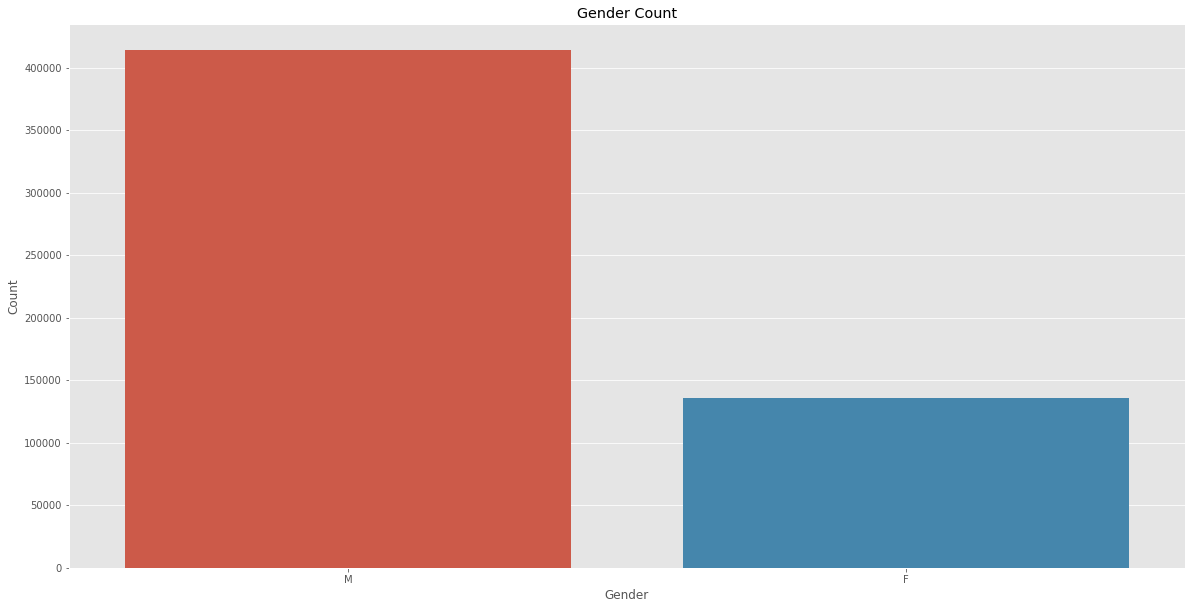

In [327]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x=train['Gender'], order=train['Gender'].value_counts(ascending=False).index)
val = train["Gender"].value_counts(ascending=False).values
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

There are more Male purchasers as comapred to Female purchasers.

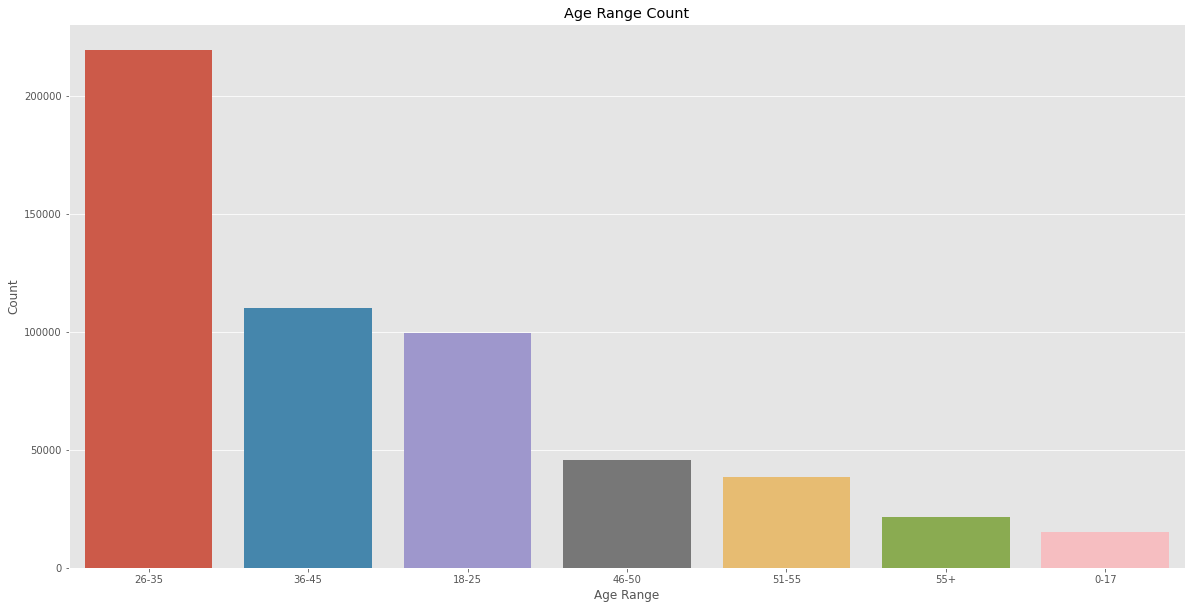

In [328]:
plt.figure(figsize=(20,10))
ax = sns.countplot(train['Age'], order=train['Age'].value_counts(ascending=False).index)
val = train["Age"].value_counts(ascending=False).values
plt.title("Age Range Count")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

Most purchasers belong to the age-group 26-35.

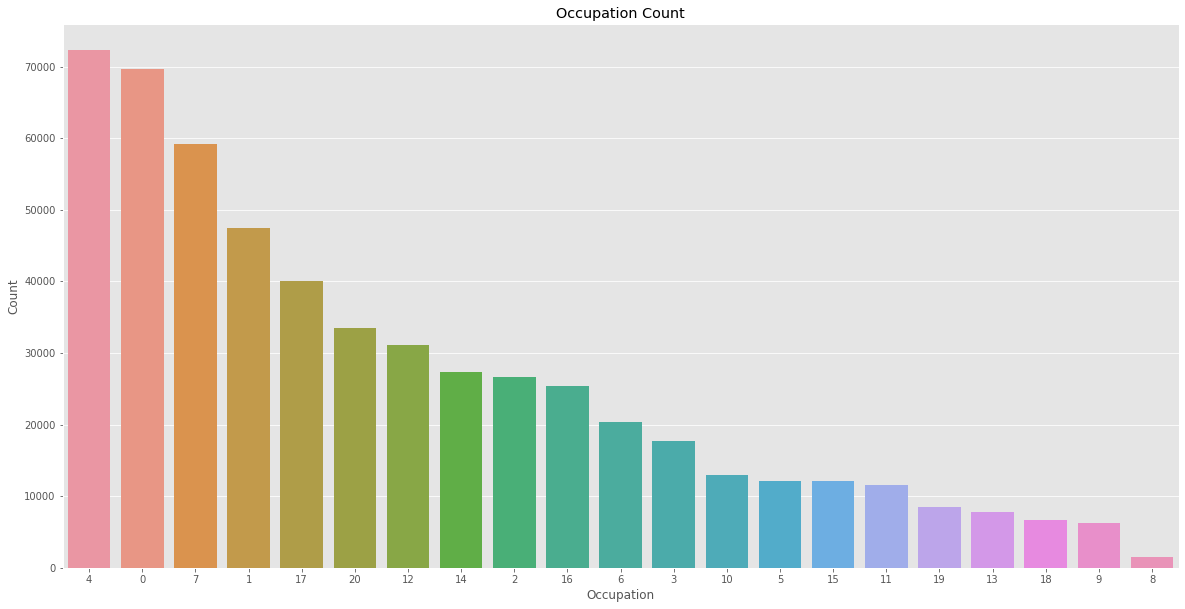

In [329]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['Occupation'], order=train['Occupation'].value_counts(ascending=False).index)
val = train["Occupation"].value_counts(ascending=False).values
plt.title("Occupation Count")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

Most purchasers have occupation 4.

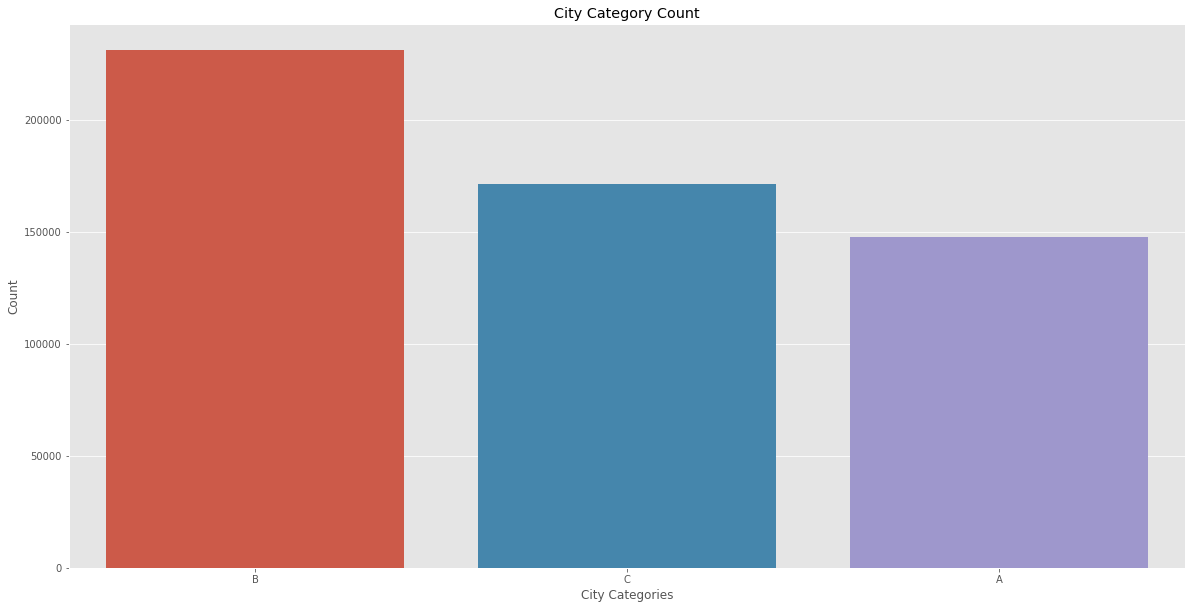

In [330]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['City_Category'], order=train['City_Category'].value_counts(ascending=False).index)
val = train["City_Category"].value_counts(ascending=False).values
plt.title("City Category Count")
plt.xlabel("City Categories")
plt.ylabel("Count")
plt.show()

Most purchasers belong to City B.

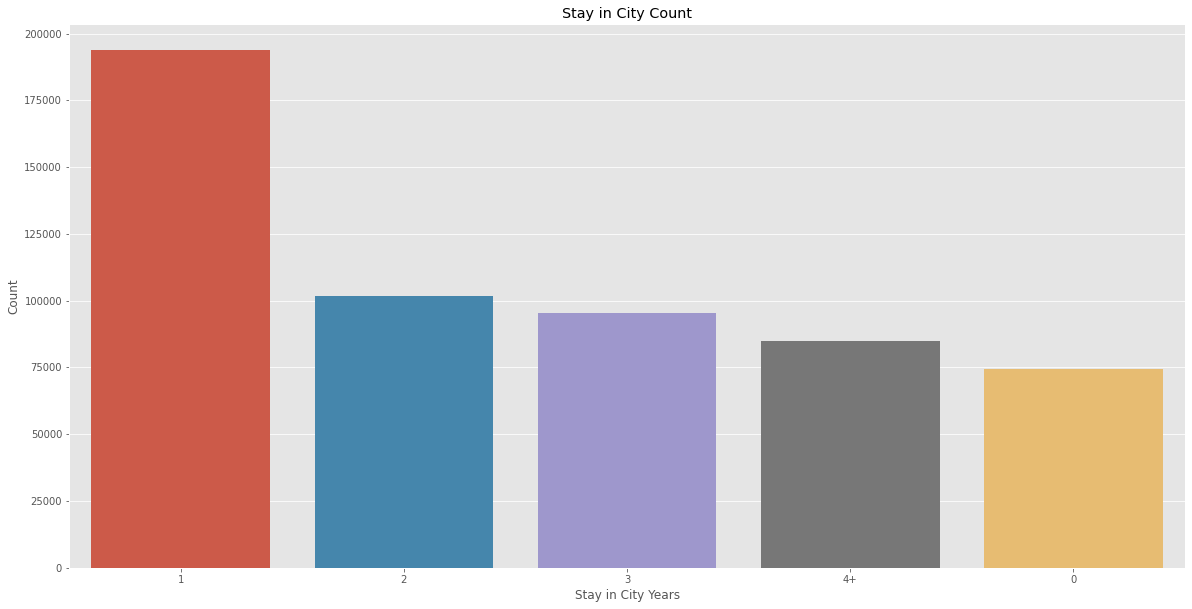

In [331]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['Stay_In_Current_City_Years'], order=train['Stay_In_Current_City_Years'].value_counts(ascending=False).index)
val = train['Stay_In_Current_City_Years'].value_counts(ascending=False).values
plt.title("Stay in City Count")
plt.xlabel("Stay in City Years")
plt.ylabel("Count")
plt.show()

Most purchasers are new comers to the city, as a result of which they may need to buy products.

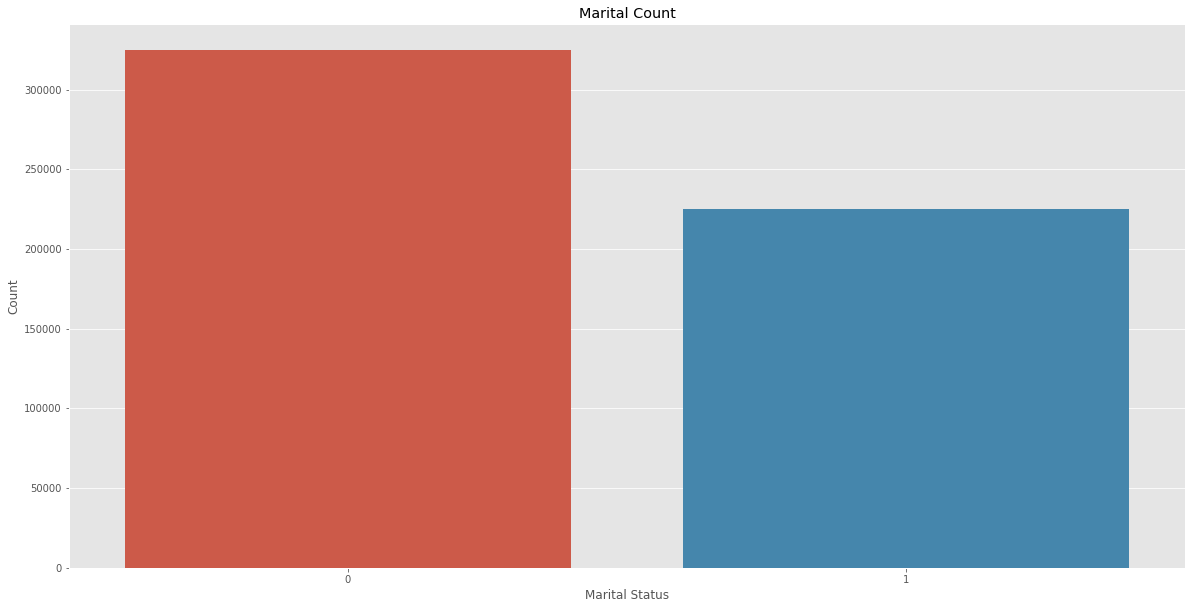

In [332]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['Marital_Status'], order=train['Marital_Status'].value_counts(ascending=False).index)
val = train['Marital_Status'].value_counts(ascending=False).values
plt.title("Marital Count")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Most purchasers belong to marital status 0.

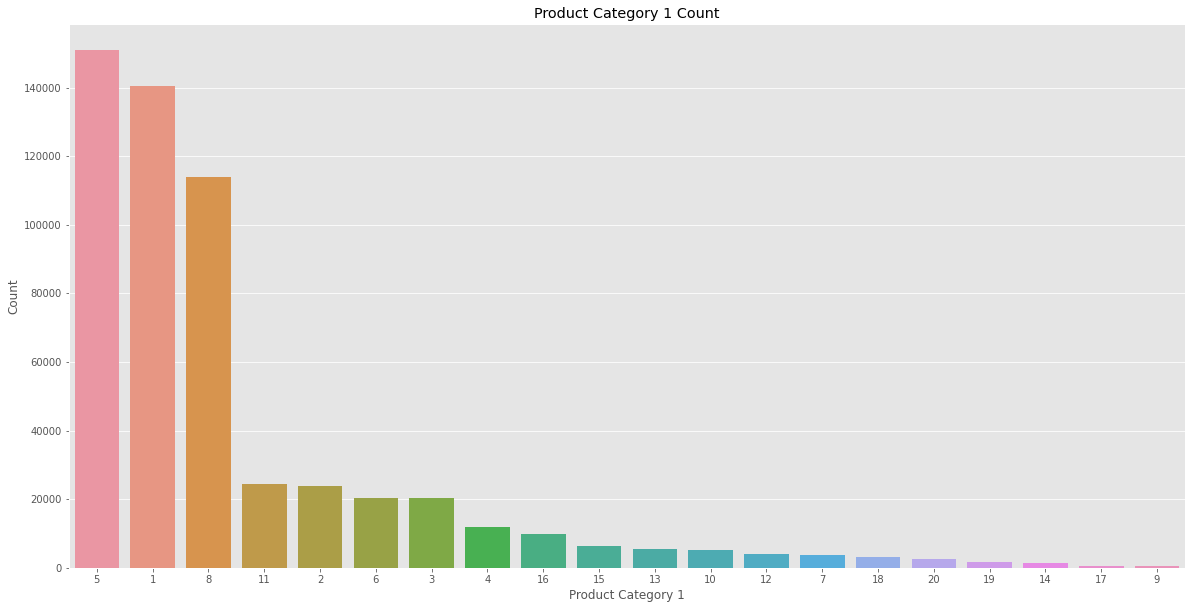

In [333]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['Product_Category_1'], order=train['Product_Category_1'].value_counts(ascending=False).index)
val = train['Product_Category_1'].value_counts(ascending=False).values
plt.title("Product Category 1 Count")
plt.xlabel("Product Category 1")
plt.ylabel("Count")
plt.show()

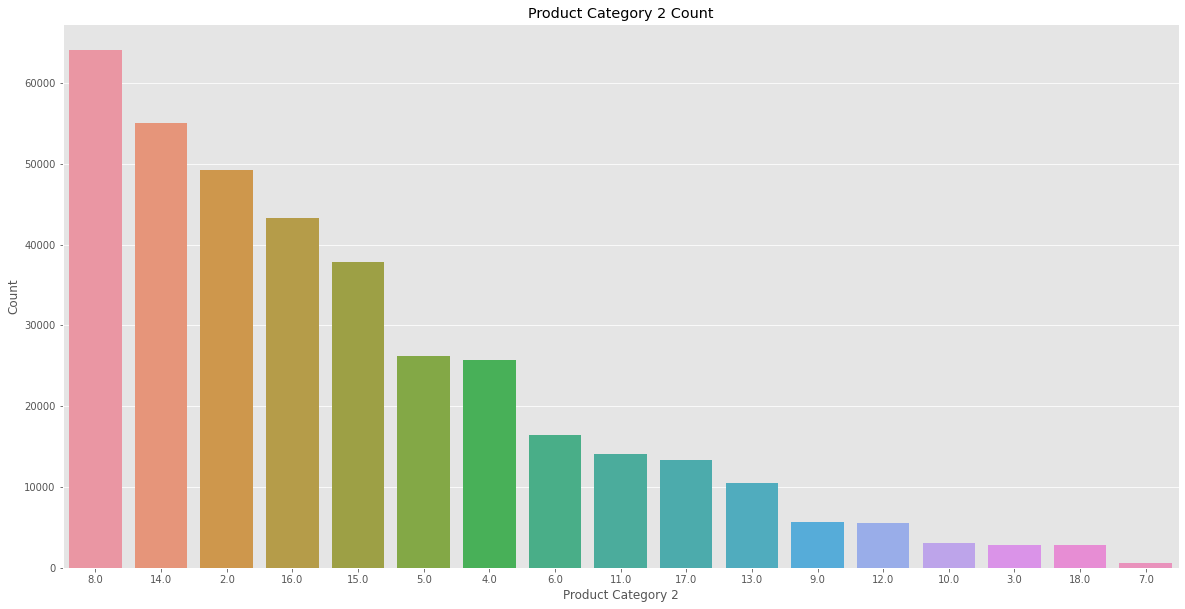

In [334]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['Product_Category_2'], order=train['Product_Category_2'].value_counts(ascending=False).index)
val = train['Product_Category_2'].value_counts(ascending=False).values
plt.title("Product Category 2 Count")
plt.xlabel("Product Category 2")
plt.ylabel("Count")
plt.show()

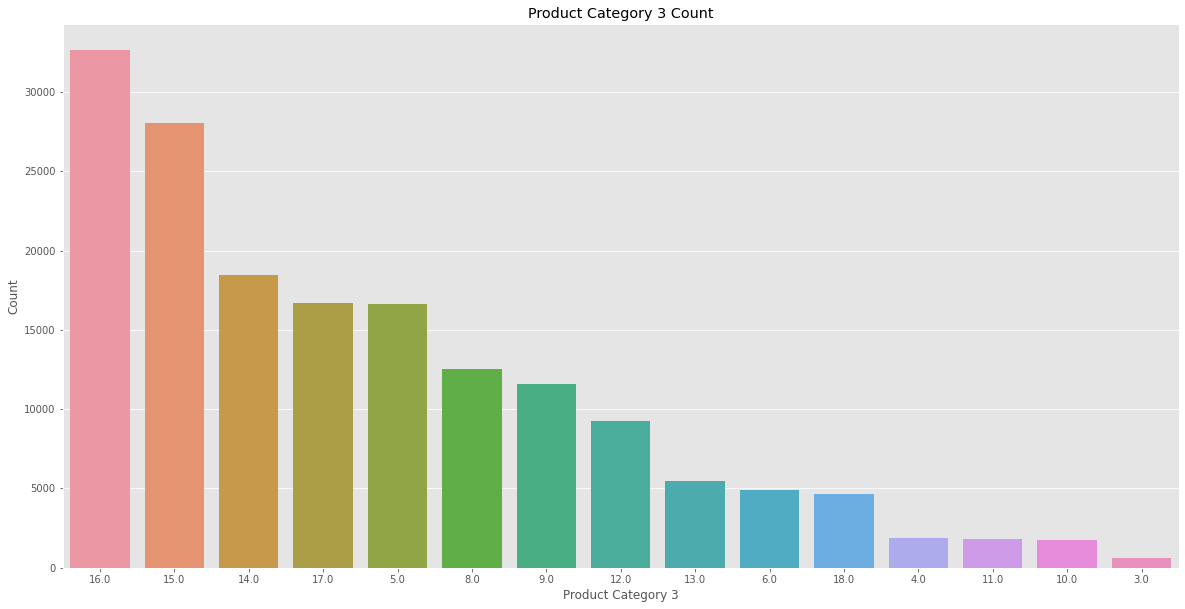

In [335]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(train['Product_Category_3'], order=train['Product_Category_3'].value_counts(ascending=False).index)
val = train['Product_Category_3'].value_counts(ascending=False).values
plt.title("Product Category 3 Count")
plt.xlabel("Product Category 3")
plt.ylabel("Count")
plt.show()

##Product_Category vs Purchase Amount

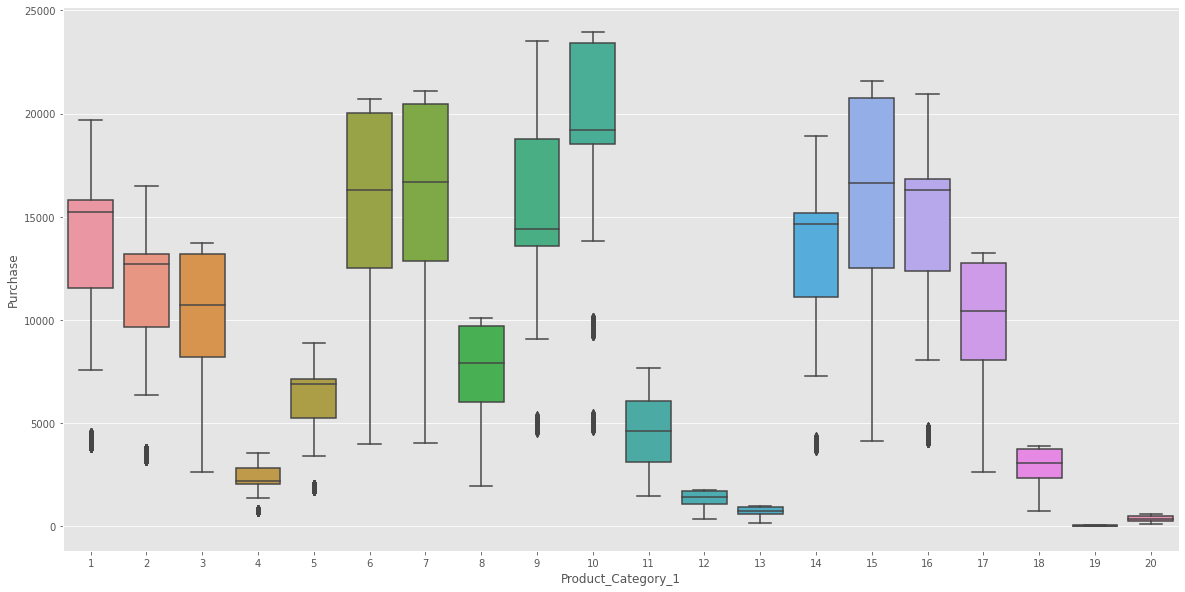

In [336]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Product_Category_1'],train['Purchase'])
plt.show()

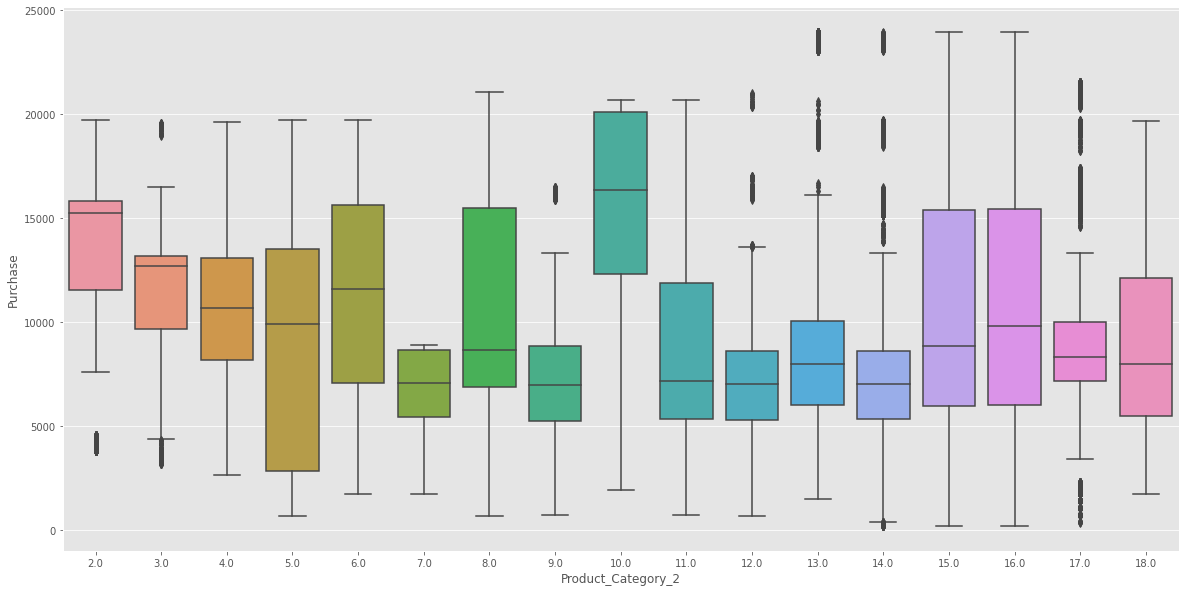

In [337]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Product_Category_2'],train['Purchase'])
plt.show()

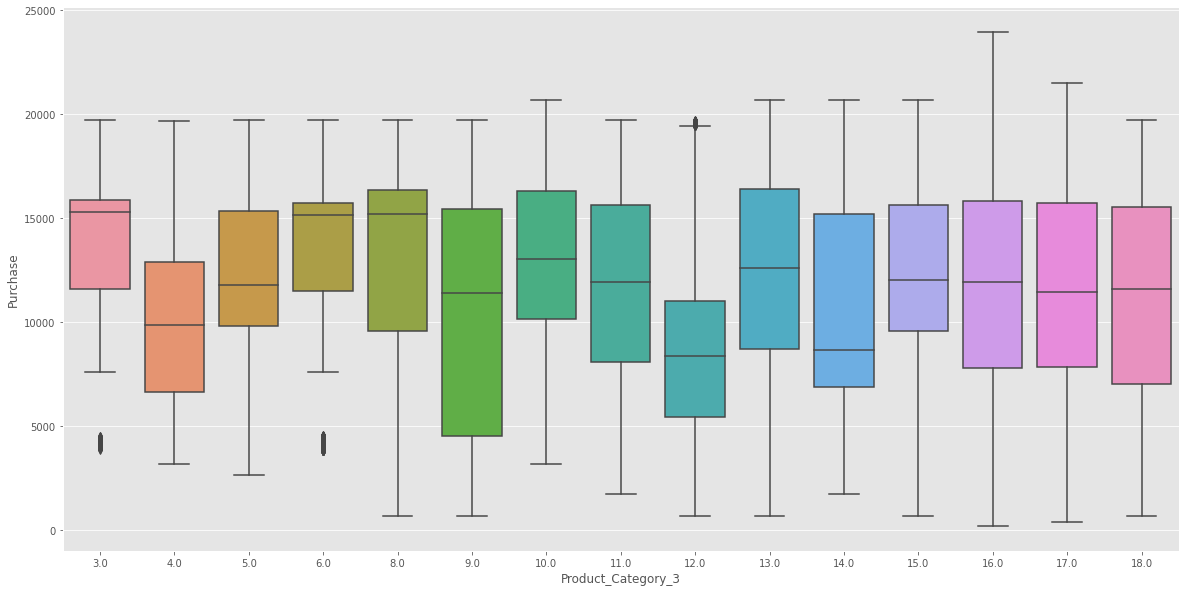

In [338]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Product_Category_3'],train['Purchase'])
plt.show()

##Age vs Purchase Amount

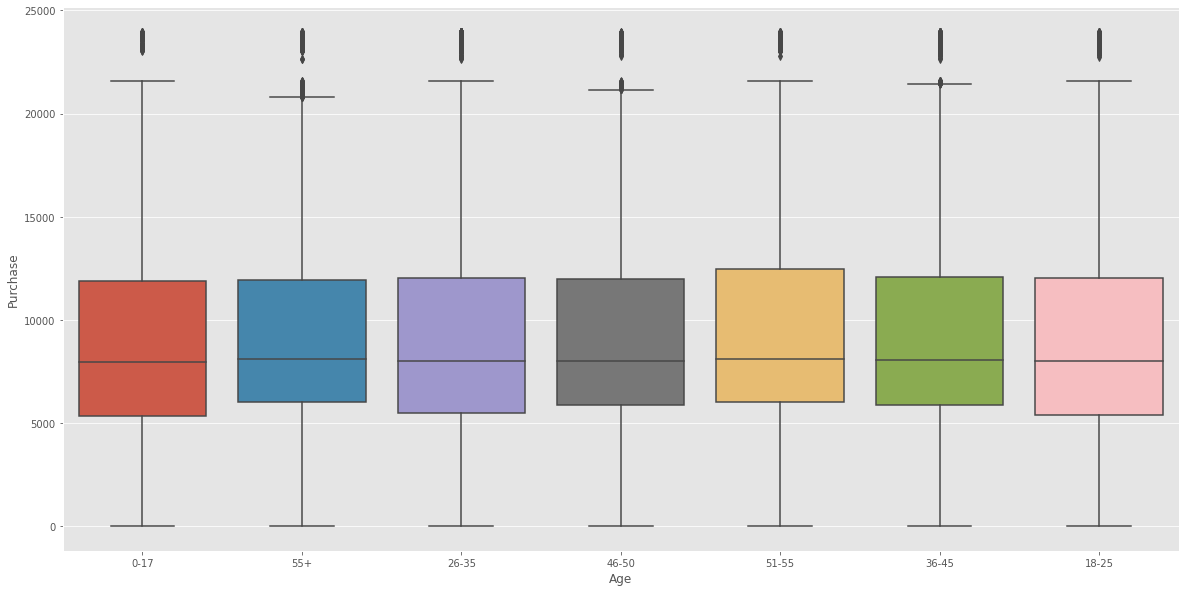

In [339]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Age'],train['Purchase'])
plt.show()

Customer's age has low impact on their purchasing power.

##City Category vs Purchase Amount

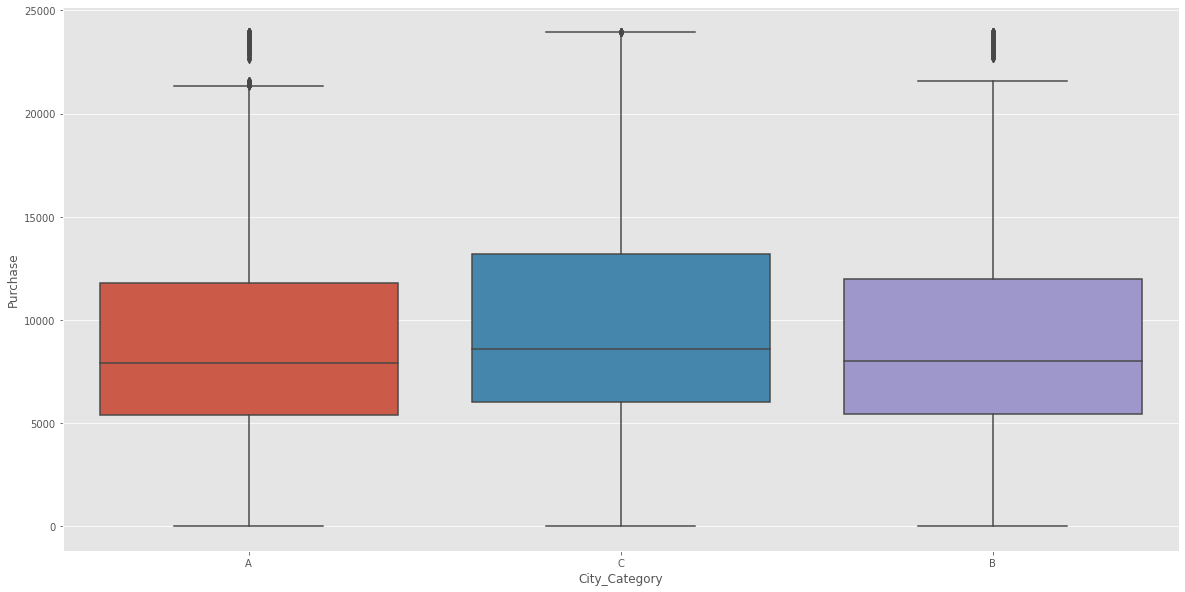

In [340]:
plt.figure(figsize=(20,10))
sns.boxplot(train['City_Category'],train['Purchase'])
plt.show()

Purchasing power of customers from C category city is the highest, followeed by B and A.

##Stay In Current City Years vs Purchase Amount

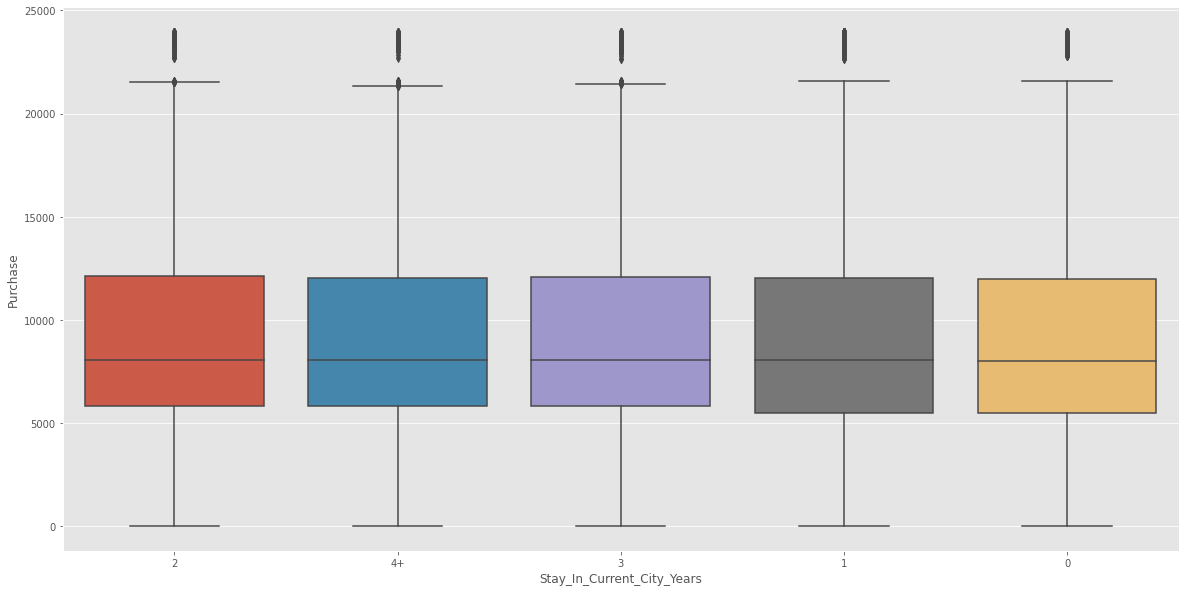

In [341]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Stay_In_Current_City_Years'],train['Purchase'])
plt.show()

The number of years the customers reside in the current city has low impact on their purchasing power.

##Purchasing Patern

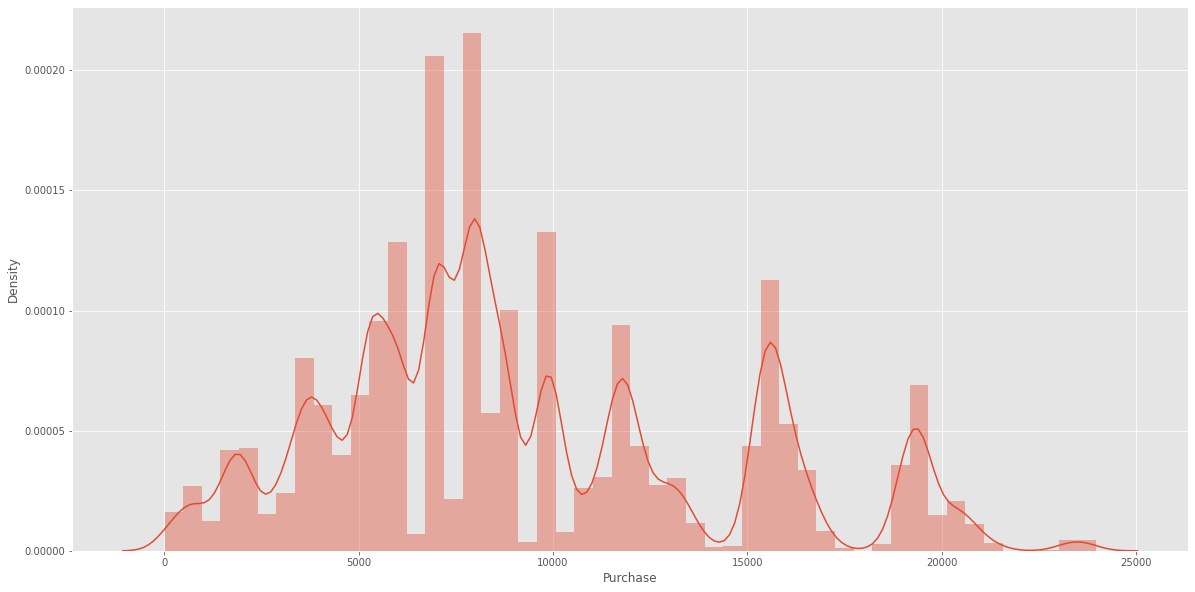

In [342]:
plt.figure(figsize=(20,10))
sns.distplot(train['Purchase'])
plt.show()

The purchase variable seems to be normally distributed.

##Pattern of Purchased Products

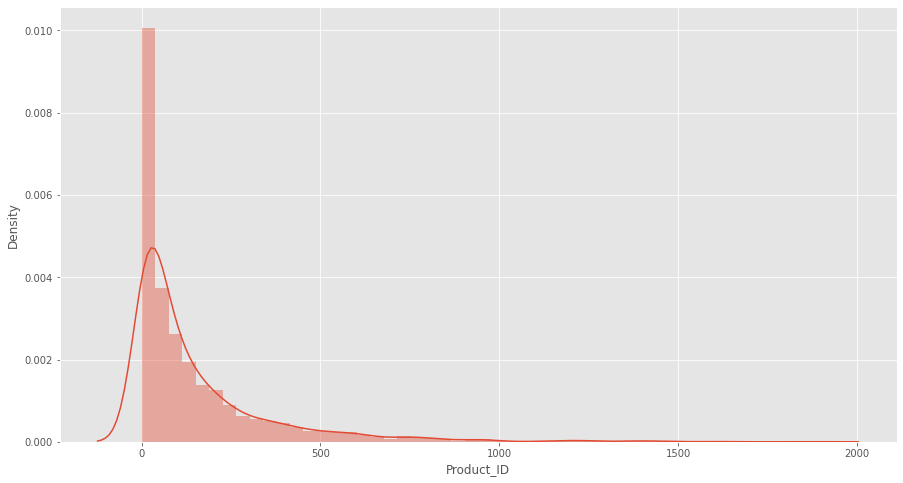

In [343]:
plt.figure(figsize=(15,8))
sns.distplot(train['Product_ID'].value_counts())
plt.show()

There are around 500 products that are purchased many times whereas rest of the products are rarely purchased.

#Handling Missing Values

###For train-set

In [344]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [345]:
train["Product_Category_2"] = train["Product_Category_2"].fillna(value=8)
train["Product_Category_3"] = train["Product_Category_3"].fillna(value=16)

# train["Product_Category_2"] = train["Product_Category_2"].fillna(value=0)
# train["Product_Category_3"] = train["Product_Category_3"].fillna(value=0)

# train["Product_Category_2"] = train["Product_Category_2"].fillna(value=9)
# train["Product_Category_3"] = train["Product_Category_3"].fillna(value=14)

In [346]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Label Encoding


In [347]:
def label_encoding(df):
    df['Age'] = df['Age'].replace('0-17', 17)
    df['Age'] = df['Age'].replace('18-25', 25)
    df['Age'] = df['Age'].replace('26-35', 35)
    df['Age'] = df['Age'].replace('36-45', 45)
    df['Age'] = df['Age'].replace('46-50', 50)
    df['Age'] = df['Age'].replace('51-55', 55)
    df['Age'] = df['Age'].replace('55+', 60)
    df['Gender'] = df['Gender'].replace('M', 0)
    df['Gender'] = df['Gender'].replace('F', 1)
    df['City_Category'] = df['City_Category'].replace('A', 0)
    df['City_Category'] = df['City_Category'].replace('B', 1)
    df['City_Category'] = df['City_Category'].replace('C', 2)
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)
    return df


train = label_encoding(train)

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)

train['Product_Category_2'] = train['Product_Category_2'].astype(int)
train['Product_Category_3'] = train['Product_Category_3'].astype(int)

In [348]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,17,10,0,2,0,3,8,16,8370
1,1000001,P00248942,1,17,10,0,2,0,1,6,14,15200
2,1000001,P00087842,1,17,10,0,2,0,12,8,16,1422
3,1000001,P00085442,1,17,10,0,2,0,12,14,16,1057
4,1000002,P00285442,0,60,16,2,4,0,8,8,16,7969


In [349]:
train['User_ID'] = train['User_ID'] - 1000000

train.Product_ID = train.Product_ID.str.replace('P00', '')

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,069042,1,17,10,0,2,0,3,8,16,8370
1,1,248942,1,17,10,0,2,0,1,6,14,15200
2,1,087842,1,17,10,0,2,0,12,8,16,1422
3,1,085442,1,17,10,0,2,0,12,14,16,1057
4,2,285442,0,60,16,2,4,0,8,8,16,7969


In [350]:
avg_purchase_per_product=pd.DataFrame(train.groupby(['Product_ID'])['Purchase'].mean())
avg_purchase_per_product.reset_index(inplace=True)
avg_purchase_per_user=pd.DataFrame(train.groupby(['User_ID'])['Purchase'].mean())
avg_purchase_per_user.reset_index(inplace=True)

In [351]:
def create_var(data):
    data['avg_purchase_per_product']=data['Product_ID'].map(avg_purchase_per_product.set_index('Product_ID')['Purchase'])
    data['avg_purchase_per_user']=data['User_ID'].map(avg_purchase_per_user.set_index('User_ID')['Purchase'])
    return data
 
train=create_var(train)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,avg_purchase_per_product,avg_purchase_per_user
0,1,069042,1,17,10,0,2,0,3,8,16,8370,11870.86344,9545.51429
1,1,248942,1,17,10,0,2,0,1,6,14,15200,16304.03098,9545.51429
2,1,087842,1,17,10,0,2,0,12,8,16,1422,1237.89216,9545.51429
3,1,085442,1,17,10,0,2,0,12,14,16,1057,1455.14076,9545.51429
4,2,285442,0,60,16,2,4,0,8,8,16,7969,7692.76355,10525.61039


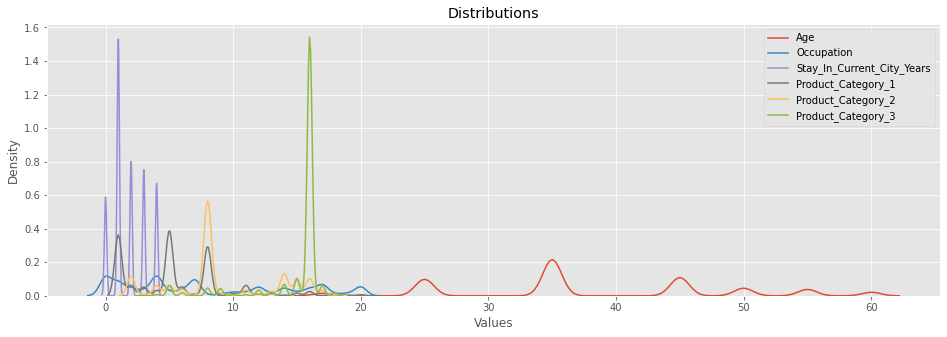

In [352]:
plt.style.use('ggplot')
pd.set_option("display.precision", 5)
num_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

def plotDistribGraph(pdf):
    fig, a = plt.subplots(ncols=1, figsize=(16, 5))
    a.set_title("Distributions")
    for col in num_col:
        sns.kdeplot(pdf[col], ax=a)
    plt.legend(num_col)
    plt.xlabel('Values')
    plt.show()


plotDistribGraph(train)

In [353]:
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Before scaling")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    a.legend(num_col)
    b.set_title("After scaling")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    b.legend(num_col)
    plt.xlabel('Scaled_value')
    plt.show()

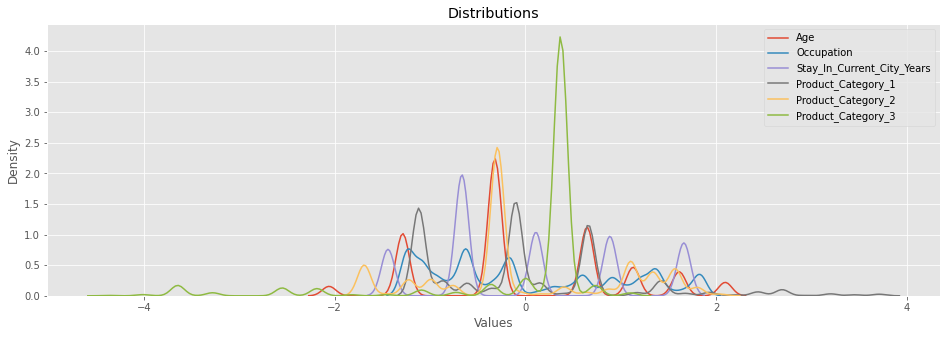

In [354]:
scaler = StandardScaler()

for col in num_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scaler.transform(test[col].values.reshape(-1,1))
plotDistribGraph(train)

In [355]:
train['Product_ID'] = scaler.fit_transform(train['Product_ID'].values.reshape(-1,1))

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,avg_purchase_per_product,avg_purchase_per_user
0,1,-1.02877,1,-2.05957,0.29486,0,0.10980,0,-0.61081,-0.29361,0.36879,8370,11870.86344,9545.51429
1,1,0.72214,1,-2.05957,0.29486,0,0.10980,0,-1.11891,-0.75936,-0.36118,15200,16304.03098,9545.51429
2,1,-0.84580,1,-2.05957,0.29486,0,0.10980,0,1.67566,-0.29361,0.36879,1422,1237.89216,9545.51429
3,1,-0.86916,1,-2.05957,0.29486,0,0.10980,0,1.67566,1.10366,0.36879,1057,1455.14076,9545.51429
4,2,1.07738,0,2.09484,1.21473,2,1.66086,0,0.65945,-0.29361,0.36879,7969,7692.76355,10525.61039


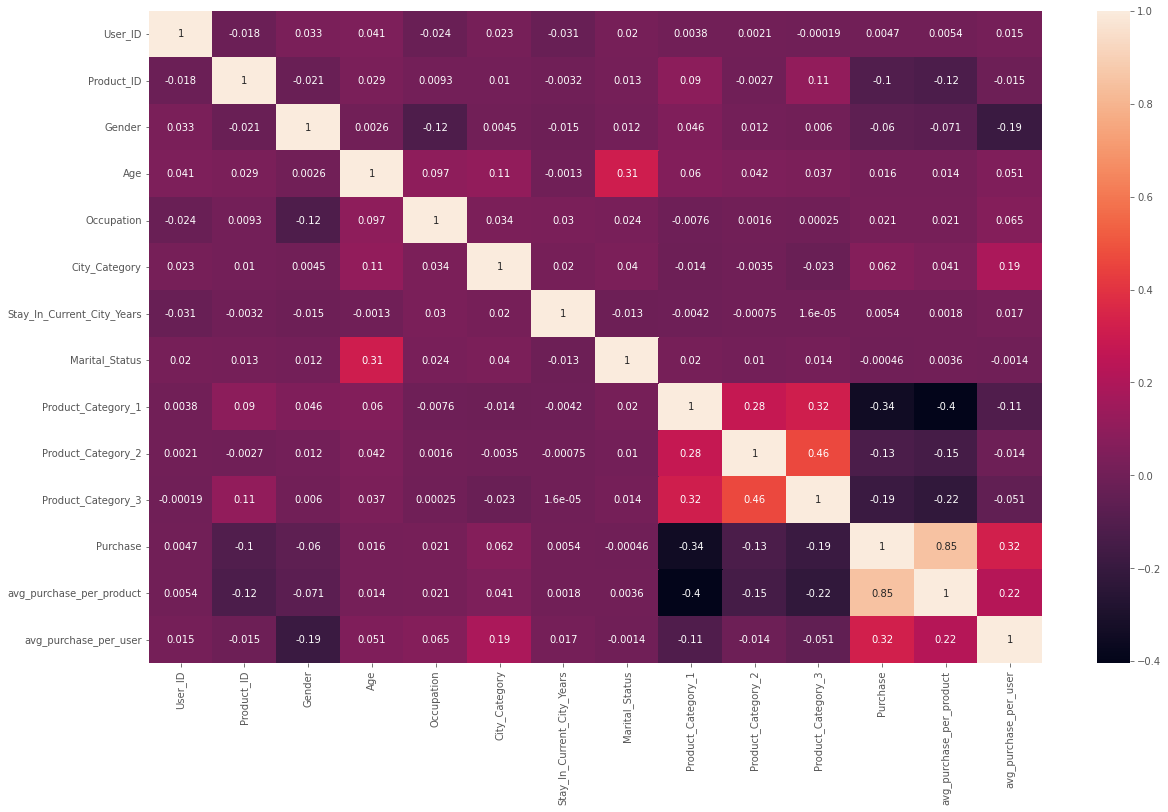

In [356]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.show()

In [357]:
gender_p=train.groupby(['Gender'])['Purchase'].mean()
print(gender_p)

Gender
0    9437.52604
1    8734.56577
Name: Purchase, dtype: float64


Males are willing to spend more than females.

In [358]:
age_p=train.groupby(['Age'])['Purchase'].mean()
print(age_p)

Age
-2.05957    8933.46464
-1.28666    9169.66361
-0.32051    9252.69063
 0.64563    9331.35069
 1.12870    9208.62570
 1.61177    9534.80803
 2.09484    9336.28046
Name: Purchase, dtype: float64


Purchasers belonging to age-group 0-17 spend the least whereas those belonging to age group 50-55 spend the most. But, there is low disparity in the spending patterns among all the age-groups.

In [359]:
occupation_p=train.groupby(['Occupation'])['Purchase'].mean()
print(occupation_p)

Occupation
-1.23825    9124.42859
-1.08494    8953.19327
-0.93163    8952.48168
-0.77832    9178.59309
-0.62501    9213.98025
-0.47170    9333.14930
-0.31838    9256.53569
-0.16507    9425.72822
-0.01176    9532.59250
 0.14155    8637.74376
 0.29486    8959.35538
 0.44818    9213.84585
 0.60149    9796.64024
 0.75480    9306.35106
 0.90811    9500.70277
 1.06142    9778.89116
 1.21473    9394.46435
 1.36805    9821.47824
 1.52136    9169.65584
 1.67467    8710.62723
 1.82798    8836.49490
Name: Purchase, dtype: float64


Occupation has low impact on the purchasing habit of the customers.

In [360]:
city_cat_p=train.groupby(['City_Category'])['Purchase'].mean()
print(city_cat_p)

City_Category
0    8911.93922
1    9151.30056
2    9719.92099
Name: Purchase, dtype: float64


C city-category customers spend more, followed by B and A.

In [361]:
marital_p=train.groupby(['Marital_Status'])['Purchase'].mean()
print(marital_p)

Marital_Status
0    9265.90762
1    9261.17457
Name: Purchase, dtype: float64


The marital status of customers as negligible impact on the purchasing pattern of customers.

In [362]:
years_p=train.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean()
print(years_p)

Stay_In_Current_City_Years
-1.44126    9180.07512
-0.66573    9250.14592
 0.10980    9320.42981
 0.88533    9286.90412
 1.66086    9275.59887
Name: Purchase, dtype: float64


The number of years that the customers reside in the current city has low impact on the purchasing pattern of the customers.

#Modelling

In [363]:
y = train[['Purchase']]
x = train.drop(['Purchase'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

##Linear Regression

In [364]:
reg = linear_model.LinearRegression()
lm_model = reg.fit(x_train, y_train)
pred = lm_model.predict(x_test)

In [365]:
np.sqrt(mean_squared_error(y_test, pred))

2568.566630925744

In [366]:
r2_score(y_test, pred)

0.7374238920533335

##Random Forest

In [367]:
RF_reg = RandomForestRegressor()
RF_model = RF_reg.fit(x_train,y_train)
pred = RF_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,pred))

2528.6714667763613

In [368]:
r2_score(y_test, pred)

0.7455172493031056

##XGBoost

In [369]:
xgb = XGBRegressor(n_estimators=500,learning_rate=0.1,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)
XGB_model = xgb.fit(x_train,y_train)
pred = XGB_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,pred))

[20:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2453.294722236561

In [370]:
r2_score(y_test, pred)

0.7604627919028291